# **Classification**

Nama : Bagaskara

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
#Upload Kaggle API Key
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bkdr23","key":"504c387f809c2f78a8411144e5d099bd"}'}

In [3]:
!mkdir ~/.kaggle #make new directory in root folder
!cp kaggle.json ~/.kaggle/ #copy and paste kaggle API key to new directory
!chmod 600 ~/.kaggle/kaggle.json #permission
!kaggle datasets list

ref                                                title                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  -----------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                    DAIGT V2 Train Dataset                29MB  2023-11-16 01:38:36           2946        249  1.0              
rishabhkarn/ipl-auction-2023                       IPL Auction 2023                       4KB  2023-12-24 10:45:03            602         25  0.9411765        
bhavikjikadara/car-price-prediction-dataset        Car Price Prediction Dataset           4KB  2023-12-23 07:07:54           1159         33  0.9411765        
thedevastator/global-video-game-sales-and-reviews  Global Video Game Sales and Reviews   56KB  2023-12-20 06:36:51           1134         30  1.0              
thedrcat/daigt-proper-train-dataset     

In [4]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

 92% 202M/219M [00:01<00:00, 92.2MB/s]
100% 219M/219M [00:01<00:00, 132MB/s] 


In [8]:
import zipfile,os

In [6]:
#Extract File
zipPath = '../content/rice-image-dataset.zip' #zip path in local
zipFile = zipfile.ZipFile(zipPath, 'r')
zipFile.extractall('../content/RiceImage') #extract to new directory
zipFile.close() #close connection to object

In [14]:
base_dir = '/content/RiceImage/Rice_Image_Dataset'

In [15]:
ar_dir = os.path.join(base_dir,'Arborio')
bas_dir = os.path.join(base_dir, 'Basmati')
ip_dir = os.path.join(base_dir, 'Ipsala')
ja_dir = os.path.join(base_dir, 'Jasmine')
ka_dir = os.path.join(base_dir, 'Karacadag')

In [17]:
Total_arborio = len(os.listdir(ar_dir))
Total_basmati = len(os.listdir(bas_dir))
Total_ipsala = len(os.listdir(ip_dir))
Total_jasmine = len(os.listdir(ja_dir))
Total_karacadag = len(os.listdir(ka_dir))

# Mencetak jumlah data
print("Total Data Arborio Image     : ",Total_arborio)
print("Total Data Basmati Image     : ",Total_basmati)
print("Total Data Ipsala Image      : ",Total_ipsala)
print("Total Data Jasmine Image     : ",Total_jasmine)
print("Total Data Karacadag Image   : ",Total_karacadag)

Total Data Arborio Image     :  15000
Total Data Basmati Image     :  15000
Total Data Ipsala Image      :  15000
Total Data Jasmine Image     :  15000
Total Data Karacadag Image   :  15000


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 70

In [23]:
#Ukuran validation 20% dari dataset
val_size = 0.2

In [24]:
#Pembuatan Train dan validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = val_size
)
val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split = val_size
)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset='validation'
)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [26]:
model = Sequential([
    Conv2D(filters = 16, kernel_size = (5, 5), padding = 'Same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.2),
    BatchNormalization(),

    Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    Dropout(0.2),

    Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 batch_normalization (Batch  (None, 75, 75, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0

In [29]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

In [30]:
#callback
class TargetCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.95):
      print("\nAccuracy and Validation Accuracy has reached 95%!\nStop Train!")
      self.model.stop_training = True
Target = TargetCallback()

EarlyStop = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 5,
    verbose = 1,
    mode = 'auto'
)

In [31]:
History = model.fit(train_generator, epochs =  100, validation_data = val_generator, callbacks = [Target, EarlyStop], verbose = 1)

Epoch 1/100
858/858 [==============================] - 2261s 3s/step - loss: 0.2405 - accuracy: 0.9164 - val_loss: 0.1000 - val_accuracy: 0.9621
Epoch 2/100
858/858 [==============================] - ETA: 0s - loss: 0.1245 - accuracy: 0.9585
Accuracy and Validation Accuracy has reached 95%!
Stop Train!
858/858 [==============================] - 2327s 3s/step - loss: 0.1245 - accuracy: 0.9585 - val_loss: 0.0828 - val_accuracy: 0.9729


In [32]:
import matplotlib.pyplot as plt

Loss with Val_Loss Graph


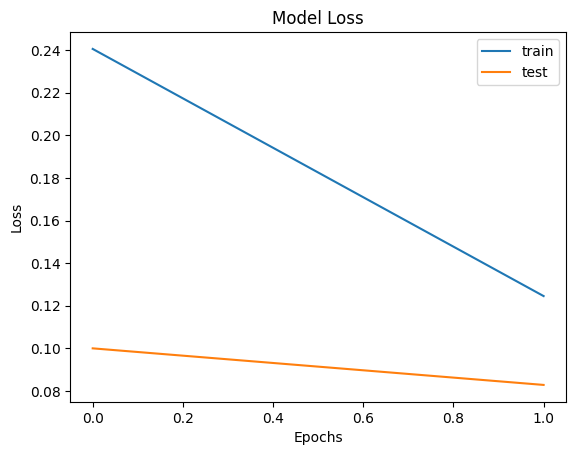

In [33]:
print("Loss with Val_Loss Graph")
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

Acc with Val_Acc Graph


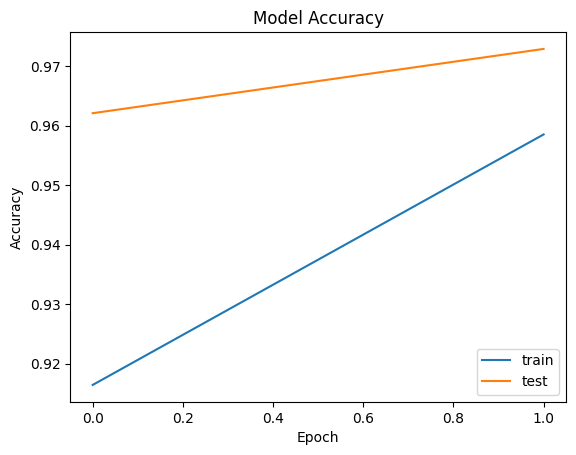

In [34]:
print("Acc with Val_Acc Graph")
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [35]:
import tensorflow as tf
import pathlib

In [36]:
#Save Model
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('Model.tflite')
tflite_model_file.write_bytes(tflite_model)

5412200